# Project: FBI Firearm Background Check Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
## Introduction
The FBI's [NICS](https://www.fbi.gov/services/cjis/nics) - Nationa Instant Criminal Background Check System - provides data on the number of firearm checks by month, state, and type from November - 1998 to July - 2020. The checks determine whether a buyer is eligible to buy firearms. Before the selling, the FBI ensures that each customer doesn't have a criminal record or ineligible to make a purchase. And our goal here is to analyze, explore, answer some questions, and draw conclusions with visuals about the given data.

**Some definitoins:**
- **Handgun:** Any firearm which has a short stock and can be held by one hand (pistols).
- **Long Gun:** A weapon designed or made to be fired from the shoulder (shotguns or rifles).

**Questions that would be able to answer during our analysis:**
- Which states have had the highest growth in gun registration and by which year?
- By how much all the gun check types is decreased over the last decade?
- What is the overall trend of gun purchases?

In order to address those question, there are a lot of things to do such as:
1. Cleaning the dataset from any incorrect datatypes or null values.
2. Calculating some statistics about the variables and look for any relationships in the data.
3. Drawing conclusions with some charts and communicating the findings.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

<a id="wrangling"></a>
## Data Wrangling

### Gathering

In [2]:
# read data as pandas data frame
df_firearm = pd.read_csv('nics-firearm-background-checks.csv')

In [3]:
# Last 5 rows of the NICS Data
df_firearm.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
14350,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
14351,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
14352,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
14353,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
14354,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


### Assessing

In [4]:
# NICS Data rows and columns respectively
df_firearm.shape

(14355, 27)

In [5]:
df_firearm.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,14331.000000,2970.000000,14335.000000,14336.000000,7370.000000,14355.000000,14332.000000,12412.000000,12410.000000,6985.000000,...,3685.000000,2860.000000,2695.000000,4620.000000,4620.000000,4620.000000,4345.000000,4620.000000,4125.000000,14355.000000
mean,7133.929105,6615.892256,6739.008720,7851.522391,494.243419,290.875096,54.241976,5.138656,7.610556,0.328561,...,1.826052,0.151399,0.151391,23.739827,19.148701,2.618831,0.852934,0.839394,0.114424,24588.756879
std,26336.528460,44858.711636,9980.059071,9157.319126,1346.138725,778.441087,571.724200,11.356445,16.003829,1.284153,...,11.265760,1.027336,0.942330,89.363244,71.056124,10.802922,4.313162,3.696040,0.421877,41874.090417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1003.500000,2141.000000,26.000000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4950.500000
50%,738.000000,0.000000,3411.000000,5184.500000,165.000000,133.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13127.000000
75%,5231.000000,38.500000,8193.500000,10566.250000,500.000000,322.000000,0.000000,5.000000,8.000000,0.000000,...,1.000000,0.000000,0.000000,12.000000,12.000000,1.000000,0.000000,0.000000,0.000000,28049.000000
max,522188.000000,626794.000000,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,467.000000,13.000000,12.000000,1299.000000,993.000000,232.000000,70.000000,62.000000,4.000000,714424.000000


In [6]:
# Show some information about the dateset (non-nul values and data type)
df_firearm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14355 entries, 0 to 14354
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      14355 non-null  object 
 1   state                      14355 non-null  object 
 2   permit                     14331 non-null  float64
 3   permit_recheck             2970 non-null   float64
 4   handgun                    14335 non-null  float64
 5   long_gun                   14336 non-null  float64
 6   other                      7370 non-null   float64
 7   multiple                   14355 non-null  int64  
 8   admin                      14332 non-null  float64
 9   prepawn_handgun            12412 non-null  float64
 10  prepawn_long_gun           12410 non-null  float64
 11  prepawn_other              6985 non-null   float64
 12  redemption_handgun         12415 non-null  float64
 13  redemption_long_gun        12414 non-null  flo

We see here the month column is a `string` ans the other columns are `floats` unlike its actual values in the dataset which is `integer`.

Text(0, 0.5, 'Counts')

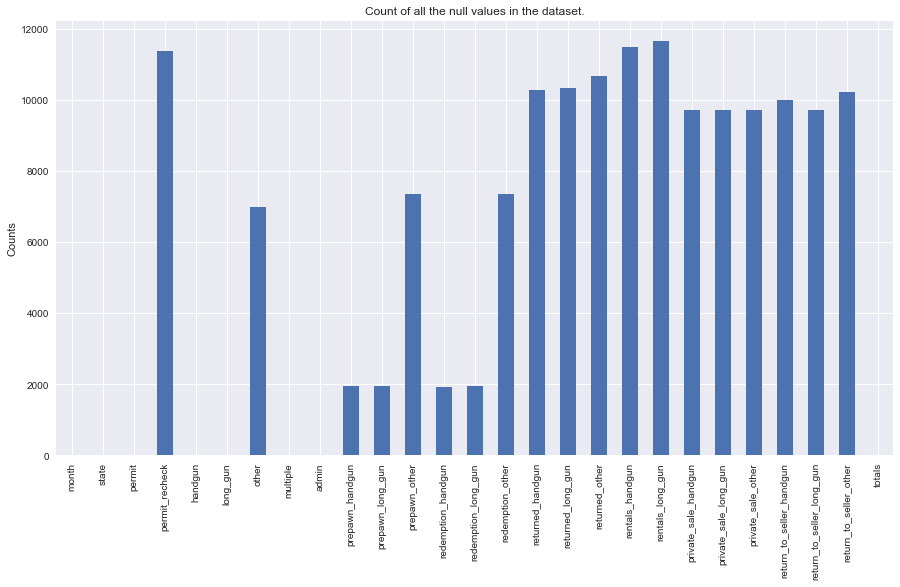

In [7]:
# Show the counts of the null values in each column in the dataset
df_firearm.isnull().sum().plot.bar(figsize=(15,8))
plt.title('Count of all the null values in the dataset.')
plt.ylabel('Counts')

There're a huge number of null values in the data set so, I assumed that some features hadn't been available in the background check since then. So, after looking at the **NICS Data**, there are some operations to perform in order to make it as tidy as possible.

### Cleaning

**First:** Let's drop all the columns that have null values more than the half of the total rows.

In [8]:
# Getting all the rows
all_rows = df_firearm.shape[0]
# Drop the columns that has more null vaules
for c in df_firearm.columns:
    if df_firearm[c].isnull().sum() > all_rows/2:
        df_firearm.drop(c, inplace=True, axis=1)
df_firearm.head()

,month,state,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
0,2020-07,Alabama,48126.0,34909.0,17250.0,2498.0,1170,0.0,33.0,20.0,1908.0,770.0,107490
1,2020-07,Alaska,69.0,4949.0,3779.0,435.0,283,0.0,0.0,1.0,177.0,129.0,10108
2,2020-07,Arizona,9402.0,31040.0,12361.0,2411.0,2866,0.0,7.0,3.0,827.0,314.0,60330
3,2020-07,Arkansas,4292.0,12391.0,7322.0,738.0,432,3.0,12.0,8.0,865.0,696.0,27647
4,2020-07,California,35097.0,67672.0,38618.0,7530.0,0,0.0,0.0,0.0,449.0,315.0,149685


I've seen that **permit** column can be excluded from the data in order to make it more consistent.

In [9]:
# Drop "permit" column from the dataset
df_firearm.drop('permit', axis=1, inplace=True)

In [10]:
# Check for any other null values
df_firearm.isnull().sum()

month                     0
state                     0
handgun                  20
long_gun                 19
other                  6985
multiple                  0
admin                    23
prepawn_handgun        1943
prepawn_long_gun       1945
redemption_handgun     1940
redemption_long_gun    1941
totals                    0
dtype: int64

There is also **other** column that has a lot of null values, so let's drop it either.

In [11]:
# Drop the "other" column
df_firearm.drop('other', axis=1, inplace=True)

The nulls values now are less than before, so I'll fill the rest nulls with zeros.

In [12]:
df_firearm.fillna(df_firearm.mean(), inplace=True)

In [13]:
# Check again for the null values
df_firearm.isnull().sum()

month                  0
state                  0
handgun                0
long_gun               0
multiple               0
admin                  0
prepawn_handgun        0
prepawn_long_gun       0
redemption_handgun     0
redemption_long_gun    0
totals                 0
dtype: int64

Now, all the data have been cleaned from the null values, let's dig into the second step.

**Second:** Converting the **month** column into `datetime` and the other columns to `int` in order to make it easier to work with.

In [14]:
df_firearm.month = pd.to_datetime(df_firearm.month)
for col in df_firearm.columns[2:]:
    df_firearm[col] = df_firearm[col].astype(int)
df_firearm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14355 entries, 0 to 14354
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                14355 non-null  datetime64[ns]
 1   state                14355 non-null  object        
 2   handgun              14355 non-null  int32         
 3   long_gun             14355 non-null  int32         
 4   multiple             14355 non-null  int32         
 5   admin                14355 non-null  int32         
 6   prepawn_handgun      14355 non-null  int32         
 7   prepawn_long_gun     14355 non-null  int32         
 8   redemption_handgun   14355 non-null  int32         
 9   redemption_long_gun  14355 non-null  int32         
 10  totals               14355 non-null  int32         
dtypes: datetime64[ns](1), int32(9), object(1)
memory usage: 729.1+ KB


Now, we got a problem here and that is the **totals** column is still the same, so let's recalculate it.

In [15]:
# Recalculate the totals by sum of [handgun,long_gun, multiple, admin, prepawn_handgun, prepawn_long_gun, redemption_handgun, redemption_long_gun] columns
df_firearm.totals = df_firearm[df_firearm.columns[2:-1]].sum(axis=1)
df_firearm.head()

,month,state,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
0,2020-07-01,Alabama,34909,17250,1170,0,33,20,1908,770,56060
1,2020-07-01,Alaska,4949,3779,283,0,0,1,177,129,9318
2,2020-07-01,Arizona,31040,12361,2866,0,7,3,827,314,47418
3,2020-07-01,Arkansas,12391,7322,432,3,12,8,865,696,21729
4,2020-07-01,California,67672,38618,0,0,0,0,449,315,107054


In [16]:
# Check for any duplicates in the dateset
df_firearm.duplicated().all()

False

In [17]:
df_firearm.state.nunique()

55

That's good, there are no duplicates in our dataset. And there are **55** unique states that have been performing background checks before any gun purchases.

As far as we got here, we've cleaned our dataset. So, let's dive deep into exploratory analysis and addressing the questions we've possed above.

<a id='eda'></a>
## Exploratory Analysis

Now, we're looking for any relationships between the variables in our dataset.

In [18]:
# pd.plotting.scatter_matrix(df_firearm.drop('totals', axis=1), figsize=(20,10))
df_firearm.corr()

,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
handgun,1.000000,0.594623,0.419811,0.034381,0.310036,0.136229,0.524976,0.318124,0.900653
long_gun,0.594623,1.000000,0.309693,0.044445,0.281275,0.209268,0.412971,0.378868,0.876091
multiple,0.419811,0.309693,1.000000,0.006742,0.261140,0.136699,0.394199,0.281645,0.457636
admin,0.034381,0.044445,0.006742,1.000000,0.013342,-0.004107,0.008421,0.003340,0.073120
prepawn_handgun,0.310036,0.281275,0.261140,0.013342,1.000000,0.728784,0.683998,0.651159,0.382916
prepawn_long_gun,0.136229,0.209268,0.136699,-0.004107,0.728784,1.000000,0.455760,0.605666,0.234186
redemption_handgun,0.524976,0.412971,0.394199,0.008421,0.683998,0.455760,1.000000,0.849402,0.594275
redemption_long_gun,0.318124,0.378868,0.281645,0.003340,0.651159,0.605666,0.849402,1.000000,0.459961
totals,0.900653,0.876091,0.457636,0.073120,0.382916,0.234186,0.594275,0.459961,1.000000


Text(0.5, 1.0, 'Histograms of all the variables in the dataset')

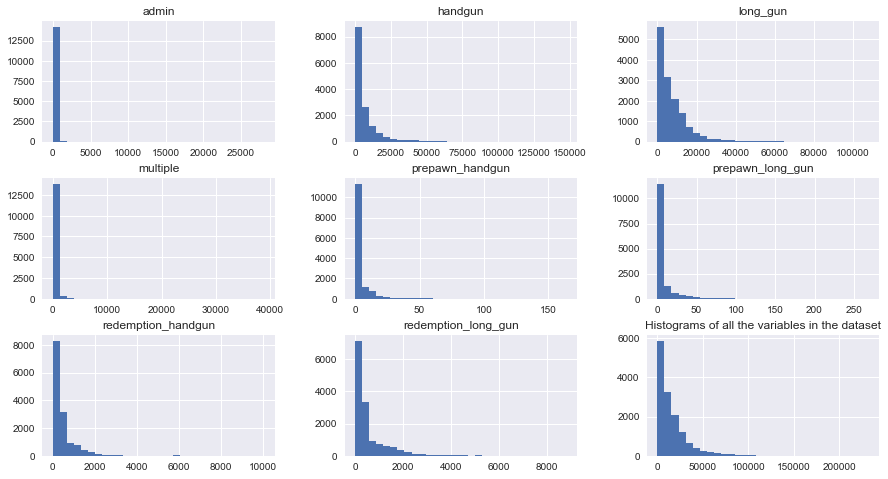

In [19]:
# Plot the histogrm for each column
df_firearm.hist(figsize=(15,8), bins=30)
plt.title('Histograms of all the variables in the dataset')

The data here seems to be much more skewed to the right.

<a id="q1"></a>
### Which states have had the highest growth in gun registration and by which year?

We can address this question in 2 ways:
1. Look for the totals number of checks and pick the maximum one.
2. Group by each state by the average of the total number of checks.

Looking at the maximum total number of checks.

In [20]:
df_firearm[df_firearm.totals == df_firearm.totals.max()]

,month,state,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
266,2020-03-01,Texas,147714,61827,8286,0,138,69,9200,5047,232281


As we see **Texas** has the most checks for gun purchases on **March - 2020**.

Now let's see the same question, but for the average of all the years.

Text(0.5, 1.0, 'The first 3 states with the most background checks')

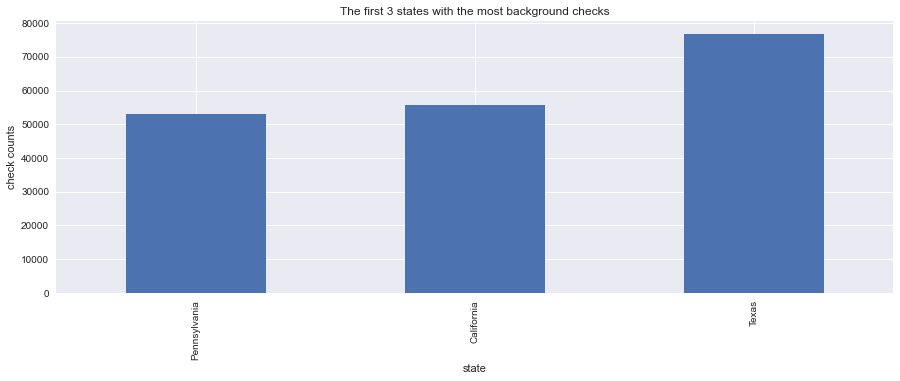

In [21]:
# Group by every state and plot the total checks for each one
df_firearm_states = df_firearm.groupby('state')
df_firearm_states.mean() \
    .totals.sort_values()[-3:] \
    .plot.bar(figsize=(15,5), grid=True)
plt.ylabel('check counts')
plt.title('The first 3 states with the most background checks')

The most 3 states in which perform a background check for any gun purchases are **Texas**, **California**, and **Pennsylvania** respectively. 

<a id="q3"></a>
### By how much all the gun check types is decreased over the last decade?

Let's get all the background check types by each year.

In [22]:
# Group by total checks for each year
firearm_years = df_firearm.groupby(df_firearm.month.dt.year).sum()
firearm_last_years = firearm_years[-11:]
firearm_last_years

,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
month,,,,,,,,,
2010,3678001,4842184,180609,6751,3128,5175,260441,406680,9382969
2011,4301389,5445966,219618,11912,3161,4489,298167,435954,10720656
2012,5682963,6866225,230270,6670,2927,3961,350060,473676,13616752
2013,6387502,7128798,241360,5664,2500,3418,359478,453518,14582238
2014,6199243,5543371,225475,4258,2225,2822,386936,452908,12817238
2015,7333808,5479441,242375,7037,2362,2531,395152,415076,13877782
2016,8085498,5988511,257723,3366,2623,2567,402461,381004,15123753
2017,7226979,5234757,236167,5643,3233,2906,415493,353393,13478571
2018,6576111,4916533,257088,14767,4359,3460,416906,321655,12510879


In [23]:
# Drop totals column
firearm_last_years = firearm_last_years.drop(['totals'], axis=1)

**Let's explore much more about the background check types.**

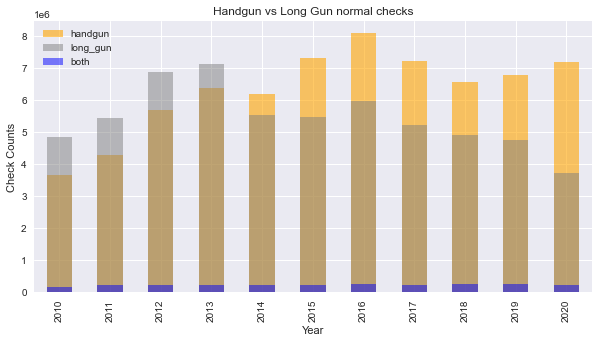

In [24]:
# Plot Normak checks
firearm_last_years.handgun.plot.bar(figsize=(10,5), color='orange', alpha=0.6, label='handgun')
firearm_last_years.long_gun.plot.bar(color='grey', alpha=0.5,label='long_gun')
firearm_last_years.multiple.plot.bar(color='blue', alpha=0.5,label='both')
plt.xlabel('Year')
plt.ylabel('Check Counts')
plt.title('Handgun vs Long Gun normal checks')
plt.legend()

It's obvious in the `handgun` **Normal** checks are almost increased since **2010** till **2013**, then started with ups and downs till **2020**.

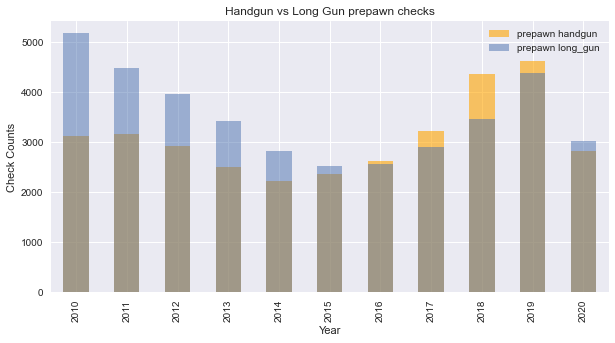

In [25]:
# Plot Prepawn checks
firearm_last_years.prepawn_handgun.plot.bar(figsize=(10,5),color='orange', alpha=0.6, label='prepawn handgun')
firearm_last_years.prepawn_long_gun.plot.bar(alpha=0.5,label='prepawn long_gun')
plt.xlabel('Year')
plt.ylabel('Check Counts')
plt.title('Handgun vs Long Gun prepawn checks')
plt.legend()

Both **Prepawn** `long_gun` and `handgun` checks have been decreased from **2010** and continued for 5 years, then returned to increase again till the **2020**.

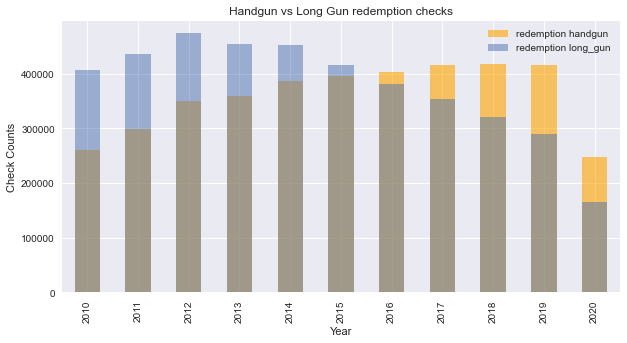

In [26]:
# Plot Redemption checks
firearm_last_years.redemption_handgun.plot.bar(figsize=(10,5), color='orange', alpha=0.6, label='redemption handgun')
firearm_last_years.redemption_long_gun.plot.bar( alpha=0.5,label='redemption long_gun')
plt.xlabel('Year')
plt.ylabel('Check Counts')
plt.title('Handgun vs Long Gun redemption checks')
plt.legend()

The result here for `handgun` **Redemption** checks are increased since **2010** till **2019** unlike the `long_gun`it has been decreased since **2012** till now.

Text(0.5, 1.0, 'Administrative checks')

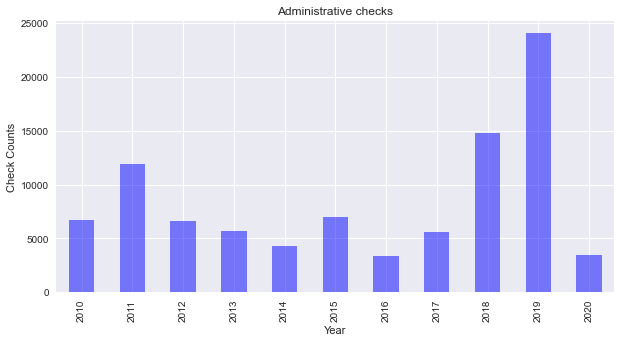

In [27]:
firearm_last_years.admin.plot.bar(figsize=(10,5),color='blue', alpha=0.5,label='both')
plt.xlabel('Year')
plt.ylabel('Check Counts')
plt.title('Administrative checks')

The **Administrative** checks have been decreased since **2011** and returned with a huge increase in **2019**.

#### Calculating the percentage for all the check types

In [28]:
# Calculate the percentage of the normal background checks.
normal_checks = firearm_last_years.handgun + firearm_last_years.long_gun + firearm_last_years.multiple
normal_percent = (normal_checks.values[-1] - normal_checks.values.mean()) / normal_checks.values.mean()
normal_percent

-0.07095258245926597

In [29]:
# Calculate the percentage of the administrative background checks.
admin_checks = firearm_last_years.admin.values
admin_percent = (admin_checks[-1] - admin_checks.mean()) / admin_checks.mean()
admin_percent

-0.5968210872864869

In [30]:
# Calculate the percentage of the prepawn background checks.
prepawn_checks = firearm_last_years.prepawn_handgun + firearm_last_years.prepawn_long_gun
prepawn_percent = (prepawn_checks.values[-1] - prepawn_checks.values.mean()) / prepawn_checks.values.mean()
prepawn_percent

-0.11541899902350466

In [31]:
# Calculate the percentage of the redemption background checks.
redem_checks = firearm_last_years.redemption_handgun + firearm_last_years.redemption_long_gun
redem_percent = (redem_checks.values[-1] - redem_checks.values.mean()) / redem_checks.values.mean()
redem_percent

-0.43957068133958294

Plotting our calculated data.

Text(0.5, 1.0, 'The percentage decreasing rate for all the check types')

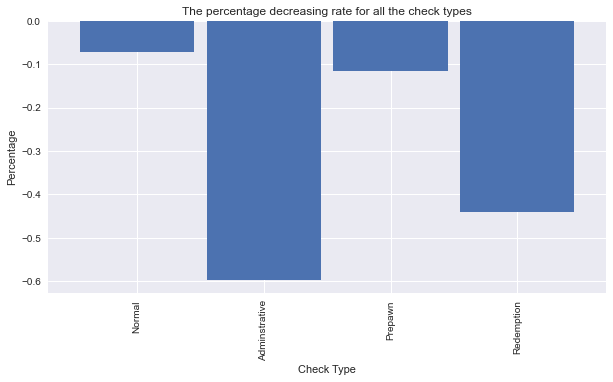

In [32]:
all_checks = {
    'Normal': normal_percent,
    'Adminstrative': admin_percent,
    'Prepawn': prepawn_percent,
    'Redemption': redem_percent
    }
pd.Series(all_checks).plot.bar(figsize=(10,5), grid=True, width=0.9)
plt.ylabel('Percentage')
plt.xlabel('Check Type')
plt.title('The percentage decreasing rate for all the check types')

In [33]:
(normal_percent - prepawn_percent)*100

4.4466416564238695

So, here is the **Administrative** background check is the most decreased check type over the last decade followed by the **Redemption** checks and there's **4.4%** a slight difference between the other two check types.

<a id="q4"></a>
### What is the overall trend of gun purchases?

In this question we have to find either **Handgun** or **Long Gun** is the most trend of purchases over the years.

In [34]:
# Get all the gun registration checks
all_gun_checks = firearm_years
all_handgun = all_gun_checks.handgun + all_gun_checks.prepawn_handgun + all_gun_checks.redemption_handgun
all_long_gun = all_gun_checks.long_gun + all_gun_checks.prepawn_long_gun + all_gun_checks.redemption_long_gun
all_gun_checks

,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
month,,,,,,,,,
1998,226738,590642,8720,2273,550,770,48510,63690,941893
1999,2583911,5272408,103743,148493,3300,4620,291060,382140,8789675
2000,2191879,4779978,95777,131648,3300,4620,291060,382140,7880402
2001,2167213,4943375,97132,100126,3754,6731,245294,358927,7922552
2002,1845112,4409311,93069,76830,5087,11094,171492,392956,7004951
2003,1857817,4390908,99236,70000,5151,8663,182368,400281,7014424
2004,1997199,4514698,101985,51613,3953,6473,182980,391585,7250486
2005,2309130,4655121,109750,13806,3216,5880,188408,382651,7667962
2006,2441325,4789591,130117,41792,3146,5924,186385,356850,7955130


Text(0, 0.5, 'Purchases Count')

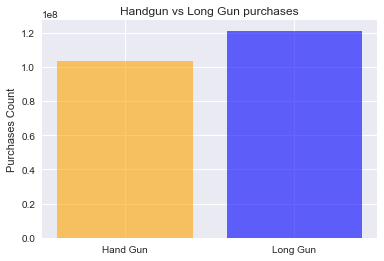

In [35]:
# Calculate all the handgun 
handgun_total = all_handgun.sum()
long_gun_total = all_long_gun.sum()
plt.bar(['Hand Gun', 'Long Gun'],[handgun_total, long_gun_total], color=['orange','blue'], alpha=0.6)
plt.title('Handgun vs Long Gun purchases')
plt.ylabel('Purchases Count')

In [36]:
total_guns =  handgun_total + long_gun_total
(long_gun_total - handgun_total)/total_guns

0.08016199052075393

([<matplotlib.patches.Wedge at 0x19c46cdf1c0>,
 [Text(0.22103078692613826, 1.7460656892656738, 'Hand Gun'),
  Text(-0.22103095040460594, -1.7460656685712703, 'Long Gun')],
 [Text(0.12056224741425721, 0.9523994668721856, '45.99%'),
  Text(-0.12056233658433049, -0.9523994555843291, '54.01%')])

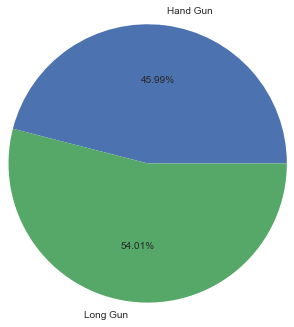

In [37]:
plt.pie([handgun_total, long_gun_total], labels=['Hand Gun', 'Long Gun'],autopct='%1.2f%%', radius=1.6)

There's **8%** not a huge difference between **Handgun** and **Long Gun** registrations, but most people tend to purchase the **Long Gun**.

<a id='conclusions'></a>
## Conclusions

In this report we've disscussed and investigated the **NICS Firearm Background Data** starting with the gathering, assessing, and cleaning the dataset. Also we've explored the data analytically by addressnig some questions and drawing somw conclusions about the dataset.

The outcome of the analysis:
1. **Texas** has the highest growth in all the gun purchases.
2. The **Administrative** gun purchases has been decreased since 2010.
3. People tend to purchase the **Long Gun** more than **Handgun**.

There're some limititions we've faced during our analysis such as:
- While cleaning the data, some columns contains a lot of null values to deal with.
- The data has lost a lot of variables that might affect the analysis process.